# Import required python packages and cleaned dataset

In [371]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import Image

# set pandas to show all columns in DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# set seaborn style
sns.set_style("dark")
sns.set_style("ticks")

In [372]:
# import dataset
saccades_an = pd.read_csv('/Users/Charlie/Desktop/saccades_charac_df.csv')

# view botoom 5 lines of imported data
saccades_an.tail()

,participant_num,gap_overlap,direction,trial,timepoint,Intervention,saccade_type,collection_camera,status,AverageSpeed(deg/s),MaxSpeed(deg/s),Duration(ms),Latency(ms),saccade_initiation_type,Eye,trial_presentation_number,deg_moved_in_saccade,Experiment,Sex,Age,Weight (kg),Height (m),BMI (kg/m_),VO2max (ml/kg/min),60% VO2max(L/min),Power Output 60% VO2max (W),Target Heart Rate @ Workload (bpm),FEV1/FVC (%),"Habitual Caffeine Use (1 = yes, 0 = no)"
43175,37.00,overlap,left,3.00,b,Reboxetine,Prosaccade,Both,fatigued,210.08,401.35,47.00,179.00,normal,B,98.00,10.24,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0
43176,37.00,gap,right,3.00,b,Reboxetine,Prosaccade,Both,fatigued,241.95,654.05,42.00,144.00,normal,A,99.00,10.59,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0
43177,37.00,gap,right,3.00,b,Reboxetine,Prosaccade,Both,fatigued,261.22,475.92,38.00,144.00,normal,B,99.00,10.27,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0
43178,37.00,overlap,right,3.00,b,Reboxetine,Prosaccade,Both,fatigued,233.59,604.24,43.00,139.00,normal,A,100.00,10.08,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0
43179,37.00,overlap,right,3.00,b,Reboxetine,Prosaccade,Both,fatigued,265.54,466.57,36.00,142.00,normal,B,100.00,9.92,rave,Female,21,64.65,1.70,22.37,49.00,1.88,117.00,152.00,96.30,0


# Purpose of analysis
1. To examine the similarities and differences between catecholamine treatments (DA/NA/CAF) on exercise-induced eye-movement fatigue in saccadic velocity.

2. To examine any influences of VO2max, age, and gender on oculomotor fatigue and responses to treatments intended to mitigate oculomotor fatigue.

## Aim 1
To examine the similarities and differences between catecholamine treatments on exercise-induced eye-movement fatigue (detected in saccade velocity). 

Step one: extract all the saccades with a normal initiation type (both pro and antisaccades)

Step two: extract separate out into prosaccades and antisaccades incase we want to do further analysis on those.

In [373]:
# extract all saccades with a normal initiation type from the saccades_an dataset
saccades = saccades_an[saccades_an['saccade_initiation_type'] == 'normal']

# extract prosaccades with a normal initiation type from the saccades_an dataset
prosaccades = saccades_an[(saccades_an['saccade_type'] == 'Prosaccade') & 
                    (saccades_an['saccade_initiation_type'] == 'normal')]

# extract antisaccades with a normal initiation type from the saccades_an dataset
antisaccades = saccades_an[(saccades_an['saccade_type'] == 'Antisaccade') & 
                    (saccades_an['saccade_initiation_type'] == 'normal')]

Give count of the total number of saccades initially input into analysis:

In [405]:
print(len(saccades['MaxSpeed(deg/s)']))

42474


In [437]:
saccades.groupby(['participant_num', 'saccade_type', 'Experiment', 'Intervention', 'timepoint']).describe()

60% VO2max(L/min)  \
                                                                              count   
participant_num saccade_type Experiment Intervention    timepoint                     
1.00            Antisaccade  crave      Caffeine        a                      0.00   
                                                        b                      0.00   
                                        Placebo         a                      0.00   
                                                        b                      0.00   
                Prosaccade   crave      Caffeine        a                      0.00   
                                                        b                      0.00   
                                        Placebo         a                      0.00   
                                                        b                      0.00   
2.00            Antisaccade  crave      Caffeine        a                      0.00   
                                                        b                      0.00   
                                        Placebo         a                      0.00   
                                                        b                      0.00   
                Prosaccade   crave      Caffeine        a                      0.00   
                                                        b                      0.00   
                                        Placebo         a                      0.00   
                                                        b                      0.00   
3.00            Antisaccade  crave      Caffeine        a                      0.00   
                                                        b                      0.00   
                                        Placebo         a                      0.00   
                                                        b                      0.00   
                Prosaccade   crave      Caffeine        a                      0.00   
                                                        b                      0.00   
                                        Placebo         a                      0.00   
                                                        b                      0.00   
4.00            Antisaccade  crave      Caffeine        a                      0.00   
                                                        b                      0.00   
                                        Placebo         a                      0.00   
                                                        b                      0.00   
                Prosaccade   crave      Caffeine        a                      0.00   
                                                        b                      0.00   
...                                                                             ...   
35.00           Prosaccade   rave       Methylphenidate a                    178.00   
                                                        b                    155.00   
                                        Placebo         a                    190.00   
                                                        b                     99.00   
                                        Reboxetine      a                    157.00   
                                                        b                    121.00   
36.00           Antisaccade  rave       Methylphenidate a                     79.00   
                                                        b                     96.00   
                                        Placebo         a                     86.00   
                                                        b                    105.00   
                                        Reboxetine      a                     66.00   
                                                        b                     60.00   
                Prosaccade   rave       Methylphenidate a       

A total of 42474 saccades (anti and prosaccade) were compiled in this analysis.

## Descriptive analysis
The following analysis just describes means and standard deviations to look at the max speed of saccades when participants are given the intervention in an unfatigued state (either before exercise or in an experiment with no exercise) and in a fatigued state (following three hours of exercise).

In [374]:
# create a summary of max velocities organised into intervention and 'fatigue' status
saccades_summary = saccades.groupby(['Intervention', 'status']).agg([np.mean, np.std])
# create summary table
saccades_summary = saccades_summary['MaxSpeed(deg/s)']
# show summary for all saccades
saccades_summary

mean    std
Intervention    status                  
Bupropion       fatigued   443.53 108.13
                unfatigued 444.90  94.96
Caffeine        fatigued   474.06 110.38
                unfatigued 452.36 103.73
Methylphenidate fatigued   506.94 115.96
                unfatigued 472.97 110.64
Placebo         fatigued   461.48 122.59
                unfatigued 460.78 111.29
Reboxetine      fatigued   478.94 130.24
                unfatigued 487.38 111.82

#### Saccades summary (pro and antisaccades grouped together)
When you look at the summary table for all of the saccades above, the story looks like it echoes what was reported in the papers when it comes to the drug interventions: 

Bupropion - no difference in speed between a fatigued and unfatigued state

Caffeine - increases eye movement velocity when fatigue is present

Methylphenidate - increases eye movement velocity in the presence of fatigue

Reboxetine - decreases eye movement velocity

In the case of the placebo intervention we don't see much of a difference between unfatigued and fatigued, probably because of the inclusion of the antisaccades in the dataset.

In [57]:
# create a summary of max velocities organised into intervention and 'fatigue' status
prosaccade_summary = prosaccades.groupby(['Intervention', 'status']).agg([np.mean, np.std])
# create summary table
prosaccade_summary = prosaccade_summary['MaxSpeed(deg/s)']
# show summary for prosaccades
prosaccade_summary

mean    std
Intervention    status                  
Bupropion       fatigued   458.70 108.44
                unfatigued 458.39  94.91
Caffeine        fatigued   484.68 102.16
                unfatigued 464.95 100.89
Methylphenidate fatigued   519.51 117.28
                unfatigued 479.33 113.58
Placebo         fatigued   460.84 121.10
                unfatigued 469.89 106.42
Reboxetine      fatigued   485.68 123.68
                unfatigued 507.50 111.74

#### Prosaccades summary
When you look at the summary table for the prosaccades above, the results are similar to the overall summary shown above, with the addition of a reduction in eye movement velocity in the placebo intervention: 

Bupropion - no difference in speed between a fatigued and unfatigued state

Caffeine - increases eye movement velocity when fatigue is present

Methylphenidate - increases eye movement velocity in the presence of fatigue

Reboxetine - slower eye movement velocity with fatigue

Placebo - slower eye movement velocity with fatigue

In [58]:
# create a summary of max velocities organised into intervention and 'fatigue' status
antisaccade_summary = antisaccades.groupby(['Intervention', 'status']).agg([np.mean, np.std])
# create summary table
antisaccade_summary = antisaccade_summary['MaxSpeed(deg/s)']
# show summary for prosaccades
antisaccade_summary

mean    std
Intervention    status                  
Bupropion       fatigued   427.65 105.55
                unfatigued 430.66  92.96
Caffeine        fatigued   463.29 117.20
                unfatigued 439.33 105.04
Methylphenidate fatigued   495.96 113.68
                unfatigued 467.14 107.58
Placebo         fatigued   462.06 123.98
                unfatigued 451.26 115.40
Reboxetine      fatigued   472.56 135.90
                unfatigued 468.14 108.49

#### Antisaccades summary
The summary table for the antisaccades (above) show similar results to the overall summary in response to the drug interventions. Weirdly though, there looks like there is an increase in antisaccade velocity in a fatigued state in the placebo intervention: 

Bupropion - no difference in speed between a fatigued and unfatigued state

Caffeine - increases eye movement velocity when fatigue is present

Methylphenidate - increases eye movement velocity in the presence of fatigue

Reboxetine - slower eye movement velocity with fatigue

Placebo - faster(?) eye movement velocity with fatigue

We'll check out whether it might be because of a difference in the amplitude of the antisaccades.

In [60]:
# create a summary of amplitudes organised into intervention and 'fatigue' status
antisaccade_summary_amp = antisaccades.groupby(['Intervention', 'status']).agg([np.mean, np.std])
# create summary table
antisaccade_summary_amp = antisaccade_summary_amp['deg_moved_in_saccade']
# show summary for antisaccades
antisaccade_summary_amp

mean  std
Intervention    status               
Bupropion       fatigued    8.26 2.15
                unfatigued  8.78 2.32
Caffeine        fatigued    8.75 2.31
                unfatigued  8.81 2.28
Methylphenidate fatigued    8.71 1.90
                unfatigued  8.68 2.08
Placebo         fatigued    8.91 2.20
                unfatigued  8.93 2.33
Reboxetine      fatigued    8.88 2.01
                unfatigued  8.99 2.10

#### Antisaccades amplitude
Doesn't look like a difference in amplitude in the placebo condition between the fatigued and unfatigued conditions really played a role...I'll create visualizations for all three -> all saccades, prosaccades and antisaccades.

### Create visualizations: distribution plots of max velocity across drug intervention and fatigue status

## Saccade distribution plots (pro and antisaccades grouped together)

In [66]:
# Isolate the intervention, status and max speed data for the plots
max_velocity_all = saccades[['Intervention', 'status', 'MaxSpeed(deg/s)']]
max_velocity_pro = prosaccades[['Intervention', 'status', 'MaxSpeed(deg/s)']]
max_velocity_anti = antisaccades[['Intervention', 'status', 'MaxSpeed(deg/s)']]

### Create violin plots

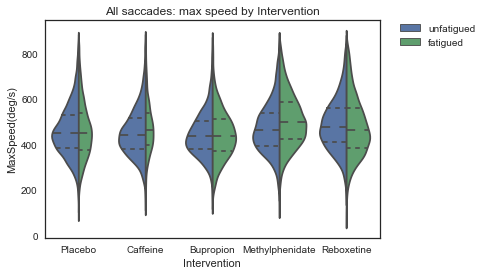

In [300]:
ax = sns.violinplot(x='Intervention', y='MaxSpeed(deg/s)', data=max_velocity_all, hue='status', 
                    split=True, order=['Placebo', 'Caffeine', 'Bupropion', 'Methylphenidate', 
                                       'Reboxetine'], scale='count', inner='quartile')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('All saccades: max speed by Intervention')
plt.show()

#### Saccades violin plot: max speed by intervention
The violin plots are scaled based on the number of observations and have the quartiles of each distribution displayed within the violin splits as 'sticks' or dashed lines.

The number of observations in the 'unfatigued' placebo and caffeine are twice as large as the 'fatigued' side of the violin because of the crave study. Like the summary tables showed, when both types of eye movement are included in the data set, there is little difference in the max velocity between unfatigued and fatigued states with the placebo, aside from a wider interquartile range when fatigued with placebo.

Bupropion looks similar between fatigued and unfatigued.

Reboxetine has a greater number of observations at the lower end of the distribution in the presence of fatigue, which has pulled down the median relative to the unfatigued condition

Having Methylphenidate and Caffeine when fatigue looks like it results in a shift up of the distribution, resulting in faster eye movements.

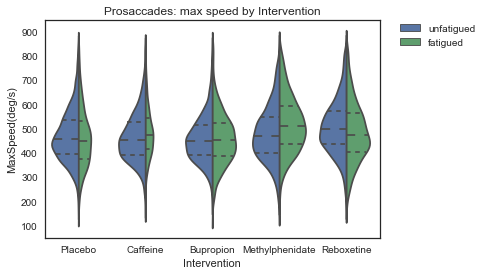

In [301]:
ax = sns.violinplot(x='Intervention', y='MaxSpeed(deg/s)', data=max_velocity_pro, hue='status', 
                    split=True, order=['Placebo', 'Caffeine', 'Bupropion', 'Methylphenidate', 
                                       'Reboxetine'], scale='count', inner='quartile')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Prosaccades: max speed by Intervention')
plt.show()

#### Prosaccades violin plot: max speed by intervention

Unlike when both saccade types are included in the dataset, when it is just the prosaccades you can see a lower max velocity in the fatigued compared to the unfatigued state with the placebo.

The effects of the other interventions on max speed in the prosaccades is the same as described for the dataset with both saccade types included.

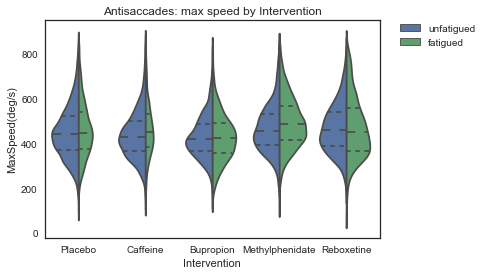

In [302]:
ax = sns.violinplot(x='Intervention', y='MaxSpeed(deg/s)', data=max_velocity_anti, hue='status', 
                    split=True, order=['Placebo', 'Caffeine', 'Bupropion', 'Methylphenidate', 
                                       'Reboxetine'], scale='count', inner='quartile')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Antisaccades: max speed by Intervention')
plt.show()

#### Antisaccades violin plot: max speed by intervention

When it is just antisaccades in the dataset there is little difference in the distribution of max velocity (aside from the number of observations) in the fatigued compared to the unfatigued state with the placebo.

The effects of the other interventions on max speed in the prosaccades is the similar to the effects described for the dataset with both saccade types included.

## Aim 2
To examine any influences of VO2max, age, and gender on oculomotor fatigue and responses to drug interventions on saccadic eye movement speed in the presence and absence of exercise fatigue.

### Add eye movement fatigue classifier
I want to add a classifier that says whether or not the participant exhibited faster, slower or no difference in eye movement speed after the exercise and/or drug intervention.

First step is to group the saccade dataset by participant, intervention and timepoint. Next means need to be calculated, followed by the generation of a bootstrap 90% CI. Once this has been down for each participant at each timepoint, I can then use the bounds of the CI to decide if the participant displayed a significant difference in eye movement speed pre to post intervention and/or exercise.

In [375]:
# group the dataset by participant, intervention and timepoint
prosaccade_bs = prosaccades.groupby(['participant_num', 'Intervention'])
antisaccade_bs = antisaccades.groupby(['participant_num', 'Intervention'])

# define functions for bootstrapping methods

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# create participant summary based on groups
def percentile(n):
    """percentile function to use in pandas.agg to add percentiles to grouped columns"""
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

# Bootstrap method to find confidence intervals for each participant at each timepoint.
Using these confidence intervals, I can classify whether pre to post the participants EM's
slowed down at the 'post' timepoint by comparing the the upper and lower bounds of the CI for the mean speed post relative to the CI for the mean speed pre. There is a third possibility too - that the eye movement increased in speed, but to begin with I am just going to do a logistic regression with a binary classifier, i.e. did eye movements slow down pre to post: 1 = yes, 0 = no.

In [376]:
def saccade_bs(grouped_data, saccade_type='saccade'):
    
    bs_results = pd.DataFrame(columns=['participant_num', 'intervention', 'saccade_type',
                                   'EM_change'])
    for name, group in grouped_data:
        # isolate timepoints within the group
        pre = group[group['timepoint'] == 'a']
        post = group[group['timepoint'] == 'b']
        
        # isolate pre and post data within groups
        pre_variable = pre['MaxSpeed(deg/s)']
        post_variable = post['MaxSpeed(deg/s)']
        
        # Compute 10,000 bootstrap replicates from pre and post data
        bs_replicates_pre = draw_bs_reps(pre_variable, np.mean, size=10000)
        bs_replicates_post = draw_bs_reps(post_variable, np.mean, size=10000)
        
        # Compute  90% CI of the mean for pre and post
        pre_lower_bound, pre_upper_bound = np.percentile(bs_replicates_pre,[5, 95])
        post_lower_bound, post_upper_bound = np.percentile(bs_replicates_post,[5, 95])
        
        # did eye movements slow, get faster or not change pre to post?
        # boolean argument for slower EMs post
        if post_upper_bound <= pre_lower_bound:
            bs_results.loc[str(name[0]) + '_' + str(name[1]) + 
                           '_' + saccade_type] = [name[0], name[1], saccade_type, 1]
            # no change in EMs
        else:
            bs_results.loc[str(name[0]) + '_' + str(name[1]) + 
                           '_'+ saccade_type] = [name[0], name[1], saccade_type, 0]
    return bs_results

In [377]:
# create bootstraps for prosaccade data
bs_prosaccades = saccade_bs(prosaccade_bs, saccade_type='Prosaccade')

In [211]:
bs_prosaccades.describe()

,participant_num
count,98.00
mean,20.59
std,10.33
min,1.00
25%,13.00
50%,21.00
75%,29.00
max,37.00


In [378]:
# create bootstraps for antisaccade data
bs_antisaccades = saccade_bs(antisaccade_bs, saccade_type='Antisaccade')

In [210]:
bs_antisaccades.describe()

,participant_num
count,98.00
mean,20.59
std,10.33
min,1.00
25%,13.00
50%,21.00
75%,29.00
max,37.00


In [379]:
bs_saccades = pd.concat([bs_antisaccades, bs_prosaccades])
bs_saccades

,participant_num,intervention,saccade_type,EM_change
1.0_Caffeine_Antisaccade,1.00,Caffeine,Antisaccade,1
1.0_Placebo_Antisaccade,1.00,Placebo,Antisaccade,0
2.0_Caffeine_Antisaccade,2.00,Caffeine,Antisaccade,1
2.0_Placebo_Antisaccade,2.00,Placebo,Antisaccade,0
3.0_Caffeine_Antisaccade,3.00,Caffeine,Antisaccade,0
3.0_Placebo_Antisaccade,3.00,Placebo,Antisaccade,1
4.0_Caffeine_Antisaccade,4.00,Caffeine,Antisaccade,0
4.0_Placebo_Antisaccade,4.00,Placebo,Antisaccade,0
5.0_Caffeine_Antisaccade,5.00,Caffeine,Antisaccade,0
5.0_Placebo_Antisaccade,5.00,Placebo,Antisaccade,0


Now we have a table that holds a binary classifier that signifying whether the participants eye movement velocity (for saccades of a particular intervention and type (anti or pro) displayed a reduction in velocity post experiment. What we need to do now is merge that table with the saccades table that contains all the rest of the participant information. In addition, categorical variables need to be altered to have numbers signifying the categories as opposed to strings.

In [380]:
# merge the prosaccades data and the classifier data to create a new dataframe that includes the 
# classifier
saccades_classifier = pd.merge(saccades, bs_saccades,  how='left', 
                                  left_on=['participant_num','Intervention', 'saccade_type'], 
                                  right_on = ['participant_num','intervention', 'saccade_type'])
del saccades_classifier['intervention']
sex = {'Male': 0, 'Female': 1}
saccades_classifier['sex'] = saccades_classifier['Sex'].map(sex)
del saccades_classifier['Sex']
saccades_classifier.set_index('participant_num')
saccades_classifier.head()

,participant_num,gap_overlap,direction,trial,timepoint,Intervention,saccade_type,collection_camera,status,AverageSpeed(deg/s),MaxSpeed(deg/s),Duration(ms),Latency(ms),saccade_initiation_type,Eye,trial_presentation_number,deg_moved_in_saccade,Experiment,Age,Weight (kg),Height (m),BMI (kg/m_),VO2max (ml/kg/min),60% VO2max(L/min),Power Output 60% VO2max (W),Target Heart Rate @ Workload (bpm),FEV1/FVC (%),"Habitual Caffeine Use (1 = yes, 0 = no)",EM_change,sex
0,1.00,gap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,208.70,537.84,44.00,273.00,normal,A,2.00,9.03,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1
1,1.00,gap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,198.92,414.95,40.00,286.00,normal,A,3.00,8.16,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1
2,1.00,gap,right,1.00,a,Caffeine,Antisaccade,A,unfatigued,224.68,548.49,42.00,272.00,normal,A,4.00,8.92,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1
3,1.00,gap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,222.08,418.14,34.00,190.00,normal,A,5.00,7.57,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1
4,1.00,overlap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,180.76,601.81,52.00,351.00,normal,A,6.00,9.38,crave,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,1,1


In [381]:
saccades_logistic = saccades_classifier.groupby(['participant_num', 'Experiment', 'Intervention', 
                                                 'EM_change', 'saccade_type']).agg([np.mean])
saccades_logistic = saccades_logistic.reset_index()
saccades_logistic.columns = saccades_logistic.columns.droplevel(1)
saccades_logistic.columns

Index(['participant_num', 'Experiment', 'Intervention', 'EM_change',
       'saccade_type', 'trial', 'AverageSpeed(deg/s)', 'MaxSpeed(deg/s)',
       'Duration(ms)', 'Latency(ms)', 'trial_presentation_number',
       'deg_moved_in_saccade', 'Age', 'Weight (kg)', 'Height (m)',
       'BMI (kg/m_)', 'VO2max (ml/kg/min)', '60% VO2max(L/min)',
       'Power Output 60% VO2max (W)', 'Target Heart Rate @ Workload (bpm)',
       'FEV1/FVC (%)', 'Habitual Caffeine Use (1 = yes, 0 = no)', 'sex'],
      dtype='object')

In [382]:
# prepare the dataset for input into the conditional logistic regresion (will have to use SPSS
# for the actual analysis)

saccades_logistic = saccades_classifier.groupby(['participant_num', 'Experiment', 'Intervention', 
                                                 'EM_change', 'saccade_type']).agg([np.mean])
saccades_logistic = saccades_logistic.reset_index()
saccades_logistic.columns = saccades_logistic.columns.droplevel(1)
saccades_logistic = saccades_logistic[['participant_num', 'Age', 'Weight (kg)', 'Height (m)', 'BMI (kg/m_)',
                                      'VO2max (ml/kg/min)', 'Habitual Caffeine Use (1 = yes, 0 = no)', 
                                       'sex', 'Experiment', 'Intervention', 'saccade_type', 'EM_change']]

# replace categorical variables with numbers
exercise = {'crave': 0, 'feeble': 1, 'rave': 1}
drug_intervention = {'Placebo': 0, 'Caffeine': 1, 'Bupropion': 2, 'Methylphenidate': 3, 
                     'Reboxetine': 4}
type_saccade = {'Prosaccade': 0, 'Antisaccade': 1}
saccades_logistic['exercise_intervention'] = saccades_logistic['Experiment'].map(exercise)
saccades_logistic['Drug'] = saccades_logistic['Intervention'].map(drug_intervention)
saccades_logistic['saccade'] = saccades_logistic['saccade_type'].map(type_saccade)
del saccades_logistic['Experiment']
del saccades_logistic['Intervention']
del saccades_logistic['saccade_type']

# drop any rows with nan values
saccades_logistic = saccades_logistic.dropna(how='any')

# change the column names
saccades_logistic = saccades_logistic.rename(index=str, columns={'BMI (kg/m_)': 'BMI', 
                                                                 'VO2max (ml/kg/min)': 'VO2max', 
                                                                 'Weight (kg)': 'Weight',
                                                                 'Habitual Caffeine Use (1 = yes, 0 = no)': 'Caffeine_use', 
                                                                 'Height (m)': 'Height'})

# save a .csv file with the participant number information to input into the SPSS RM logistic regression
saccades_logistic.to_csv('/Users/Charlie/Desktop/saccades_clr_analysis.csv')

In [383]:
saccades_logistic.columns

Index(['participant_num', 'Age', 'Weight', 'Height', 'BMI', 'VO2max',
       'Caffeine_use', 'sex', 'EM_change', 'exercise_intervention', 'Drug',
       'saccade'],
      dtype='object')

Get a count of the number of participants that were input into analysis:

In [404]:
print(len(saccades_logistic.groupby('participant_num')))

36


# Building a logistic regression:

### Features: 10

Age: years

Sex: male=0 ; female=1

BMI: kg/m squared

Weight: kg

Height: m 

VO2max: ml/kg/min

Caffeine_use: 1=yes ; 0=no 

Drug: Placebo=0; Caffeine=1; Bupropion=2; Methylphenidate=3; Reboxetine=4 

exercise_intervention: 1=yes; 0=no 

saccade: 0=prosaccade; 1=antisaccade


### Target

EM_change: 1=saccades got slower; 0=saccades didn't get slower

In [384]:
# option to import the dataset
saccades_logistic = pd.read_csv('/Users/Charlie/Desktop/saccades_clr_analysis.csv')
del saccades_logistic['Unnamed: 0']
saccades_logistic

,participant_num,Age,Weight,Height,BMI,VO2max,Caffeine_use,sex,EM_change,exercise_intervention,Drug,saccade
0,1.00,25,59.40,1.68,20.97,42.00,1,1,1,0,1,1
1,1.00,25,59.40,1.68,20.97,42.00,1,1,1,0,1,0
2,1.00,25,59.40,1.68,20.97,42.00,1,1,0,0,0,1
3,1.00,25,59.40,1.68,20.97,42.00,1,1,0,0,0,0
4,2.00,24,64.65,1.69,22.74,56.00,1,1,0,0,1,0
5,2.00,24,64.65,1.69,22.74,56.00,1,1,1,0,1,1
6,2.00,24,64.65,1.69,22.74,56.00,1,1,0,0,0,1
7,2.00,24,64.65,1.69,22.74,56.00,1,1,0,0,0,0
8,3.00,26,63.50,1.65,23.18,62.00,1,1,0,0,1,1
9,3.00,26,63.50,1.65,23.18,62.00,1,1,0,0,1,0


In [406]:
data_saccades = saccades_logistic
del data_saccades['participant_num']

## Data Exploration

In [407]:
# data summary
print ('Number of observations :: ', len(data_saccades.index))
print ('Number of columns :: ', len(data_saccades.columns))
print ('Headers :: ', data_saccades.columns.values)

Number of observations ::  192
Number of columns ::  11
Headers ::  ['Age' 'Weight' 'Height' 'BMI' 'VO2max' 'Caffeine_use' 'sex' 'EM_change'
 'exercise_intervention' 'Drug' 'saccade']


In [408]:
data_saccades['EM_change'].value_counts()

0    138
1     54
Name: EM_change, dtype: int64

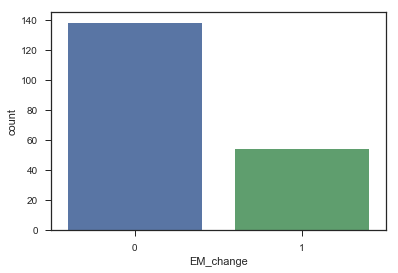

In [409]:
sns.countplot(x='EM_change', data=data_saccades)
plt.show()

The graph above shows that there were 54 instances where participants exhibited slower eye movements at the post timepoint.

In [410]:
data_saccades.groupby('EM_change').mean()

,Age,Weight,Height,BMI,VO2max,Caffeine_use,sex,exercise_intervention,Drug,saccade
EM_change,,,,,,,,,,
0,24.04,73.07,1.77,23.57,57.19,0.59,0.51,0.75,1.41,0.49
1,25.50,67.94,1.70,23.48,53.11,0.69,0.76,0.76,1.28,0.52


The table above gives a sense of the numbers across the two classes.

### General observations:
- The average age of those who didn't exhibit fatigue was less than those who did
- VO2max was higher in those who didn't exhibit slower eye movements
    
Calculating categorical means for the variables sex, exercise intervention, drug, saccade and caffeine use will give a more detailed sense of the data (NOTE: look at the features list if you want to know the categories that each of the numbers signify):

In [411]:
data_saccades.groupby('Caffeine_use').mean()

,Age,Weight,Height,BMI,VO2max,sex,EM_change,exercise_intervention,Drug,saccade
Caffeine_use,,,,,,,,,,
0,21.08,75.70,1.77,24.11,53.92,0.43,0.23,0.73,1.41,0.50
1,26.56,69.07,1.74,23.19,57.37,0.68,0.31,0.76,1.36,0.50


In [412]:
data_saccades.groupby('sex').mean()

,Age,Weight,Height,BMI,VO2max,Caffeine_use,EM_change,exercise_intervention,Drug,saccade
sex,,,,,,,,,,
0,22.77,83.67,1.85,24.93,58.83,0.47,0.16,0.75,1.38,0.50
1,25.64,63.02,1.68,22.55,54.05,0.71,0.37,0.75,1.38,0.50


In [414]:
data_saccades.groupby('exercise_intervention').mean()

,Age,Weight,Height,BMI,VO2max,Caffeine_use,sex,EM_change,Drug,saccade
exercise_intervention,,,,,,,,,,
0,22.67,70.75,1.76,23.17,55.92,0.58,0.58,0.27,0.50,0.50
1,25.04,71.92,1.75,23.67,56.08,0.62,0.58,0.28,1.67,0.50


In [415]:
data_saccades.groupby('Drug').mean()

,Age,Weight,Height,BMI,VO2max,Caffeine_use,sex,EM_change,exercise_intervention,saccade
Drug,,,,,,,,,,
0,24.25,71.53,1.75,23.50,56.03,0.61,0.58,0.36,0.67,0.50
1,23.83,72.25,1.76,23.42,55.79,0.62,0.58,0.15,0.50,0.50
2,25.00,73.75,1.77,23.67,55.67,0.67,0.58,0.42,1.00,0.50
3,25.08,70.08,1.73,23.67,56.50,0.58,0.58,0.08,1.00,0.50
4,25.08,70.08,1.73,23.67,56.50,0.58,0.58,0.38,1.00,0.50


# Visualizations

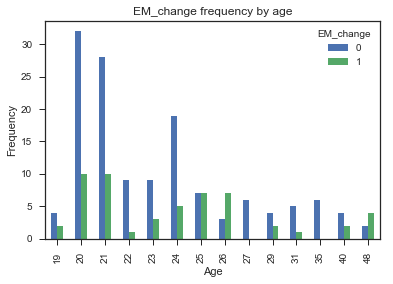

In [416]:
%matplotlib inline
pd.crosstab(data_saccades.Age, data_saccades.EM_change).plot(kind='bar')
plt.title('EM_change frequency by age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age seems like it could be a good predictor, but the sample we have over represents people in their twenties.

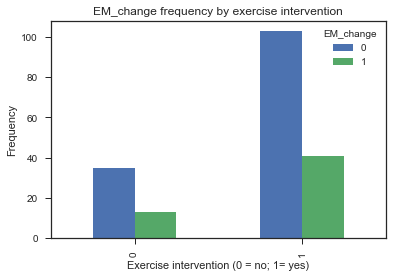

In [417]:
pd.crosstab(data_saccades.exercise_intervention, data_saccades.EM_change).plot(kind='bar')
plt.title('EM_change frequency by exercise intervention')
plt.xlabel('Exercise intervention (0 = no; 1= yes)')
plt.ylabel('Frequency')
plt.show()

As you would expect, whether the person exercise or not looks like it could be a good predictor

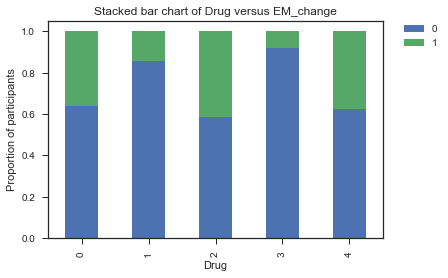

In [418]:
table=pd.crosstab(data_saccades.Drug, data_saccades.EM_change)
table.div(table.sum(1). astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar chart of Drug versus EM_change')
plt.xlabel('Drug')
plt.ylabel('Proportion of participants')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

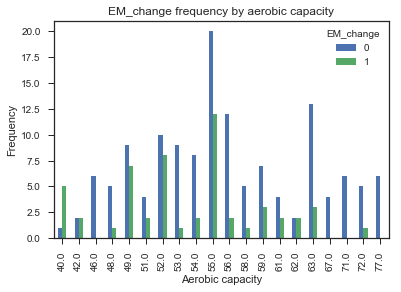

In [419]:
data_saccades.VO2max = data_saccades.VO2max.round()
pd.crosstab(data_saccades.VO2max, data_saccades.EM_change).plot(kind='bar')
plt.title('EM_change frequency by aerobic capacity')
plt.xlabel('Aerobic capacity')
plt.ylabel('Frequency')
plt.show()

It looks as though people with a lower aerobic capacity may be more susceptible to a reduction in their eye movement velocity at the post timepoint compared to those with a higher aerobic fitness

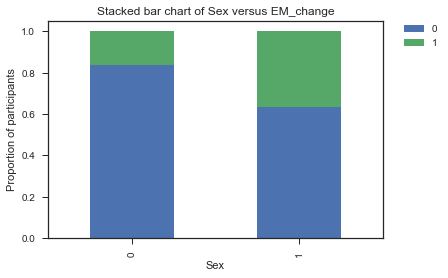

In [421]:
table=pd.crosstab(data_saccades.sex, data_saccades.EM_change)
table.div(table.sum(1). astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar chart of Sex versus EM_change')
plt.xlabel('Sex')
plt.ylabel('Proportion of participants')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

It looks as though sex might be a good predictor - a higher proportion of females exhibited slower eye movements compared to males

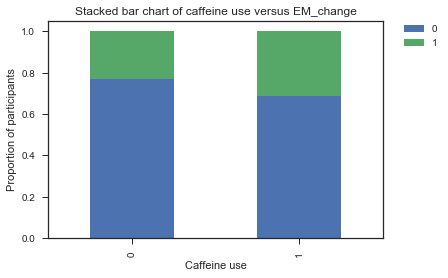

In [422]:
table=pd.crosstab(data_saccades.Caffeine_use, data_saccades.EM_change)
table.div(table.sum(1). astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar chart of caffeine use versus EM_change')
plt.xlabel('Caffeine use')
plt.ylabel('Proportion of participants')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Whether a person drinks caffeine habitually or not doesn't appear to be a strong indicator of their likelihood to exhibited slower eye movements at the 'post' timepoint

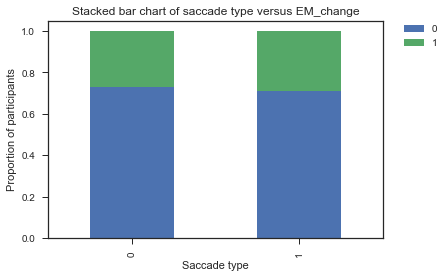

EM_change,0,1
saccade,,
0,70,26
1,68,28


In [423]:
table=pd.crosstab(data_saccades.saccade, data_saccades.EM_change)
table.div(table.sum(1). astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar chart of saccade type versus EM_change')
plt.xlabel('Saccade type')
plt.ylabel('Proportion of participants')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
table

Strangely, it doesn't look like saccade type is a great predictor of whether a persons eye movements slow or not.

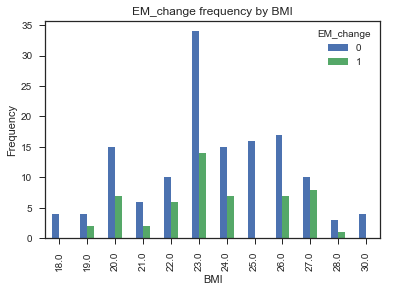

In [424]:
data_saccades.BMI = data_saccades.BMI.round()
pd.crosstab(data_saccades.BMI, data_saccades.EM_change).plot(kind='bar')
plt.title('EM_change frequency by BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

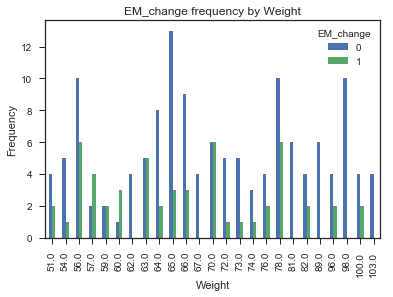

In [425]:
data_saccades.Weight = data_saccades.Weight.round()
pd.crosstab(data_saccades.Weight, data_saccades.EM_change).plot(kind='bar')
plt.title('EM_change frequency by Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

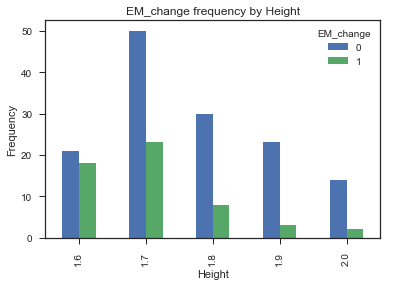

In [403]:
data_saccades.Height = data_saccades.Height.round(1)
pd.crosstab(data_saccades.Height, data_saccades.EM_change).plot(kind='bar')
plt.title('EM_change frequency by Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

Because height and weight are likely to be related to sex, I will exclude them from the model.

In [426]:
data_saccades_final = data_saccades[['EM_change', 'Age', 'VO2max', 'sex', 
                                     'exercise_intervention', 'Drug', 'BMI', 'saccade',
                                    'Caffeine_use']]
data_saccades_final_vars = data_saccades_final.columns.values.tolist()
y = ['EM_change']
X = [i for i in data_saccades_final_vars if i not in y]

In [246]:
# import packages
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [297]:
cols = ['Age', 'VO2max', 'sex', 'exercise_intervention', 'Drug', 'BMI', 'saccade', 'Caffeine_use']
X = data_saccades_final[cols]
y = data_saccades_final[y].values.ravel()

In [298]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.539046
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  192
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                            7
Date:                Tue, 28 Nov 2017   Pseudo R-squ.:                 0.09271
Time:                        00:02:35   Log-Likelihood:                -103.50
converged:                       True   LL-Null:                       -114.07
                                        LLR p-value:                  0.003551
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.0321      0.030      1.082      0.279      -0.026       0.

In [299]:
# Calculate odds ratio
np.exp(result.params)

Age                     1.03
VO2max                  0.93
sex                     2.28
exercise_intervention   1.02
Drug                    0.91
BMI                     1.07
saccade                 1.13
Caffeine_use            1.36
dtype: float64

# Model results
Based on the output above, VO2max and sex are significant to the model.

The odds ratios above tell us how a 1 unit increase or decrease in a variable affects the odds of exhibiting slower eye movements.

For example, we can see the odds of slower eye movements decrease by 7% with every 1 ml/kg/min increase in aerobic capacity. 

The sex coefficient/odds ratio suggests that females are 2.28 times more likely to exhibit slower eye movements than males are.

Age, saccade type, whether the participant uses caffeine habitually or BMI do have any significant influence on whether a participant exhibits slower eye movements.

MODEL LIMITATIONS: This model does not take into account the repeated measures component of the data - thre are between 4 and 6 repeated measures for each participant (depending on what experiment they participated in). The next analysis was performed in SPSS an accounts for this. The data that was input into is shown below:

# Using Generalized Estimating Equations to Fit a Repeated Measures Logistic Regression in SPSS

### Predictors

Sex: male=0 ; female=1 (factor)

VO2max: ml/kg/min (factor)

Drug: Placebo=0; Caffeine=1; Bupropion=2; Methylphenidate=3; Reboxetine=4 (within subject variable)

Exercise intervention: 1=yes; 2=no 

### Subject variable

Participant number: subject variable

### Response

EM_change: 1=saccades got slower; 0=saccades didn't get slower

## Fitting the model with exercise as a predictor:

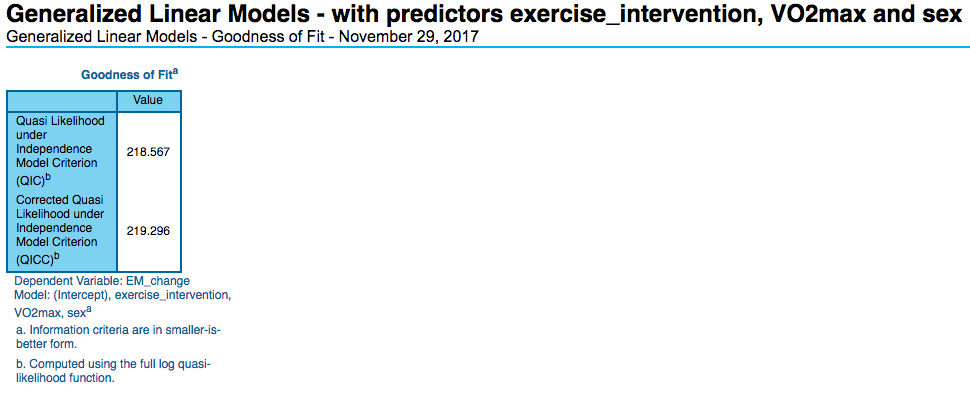

In [442]:
Image('GoF_exint-VO2-sex.png')

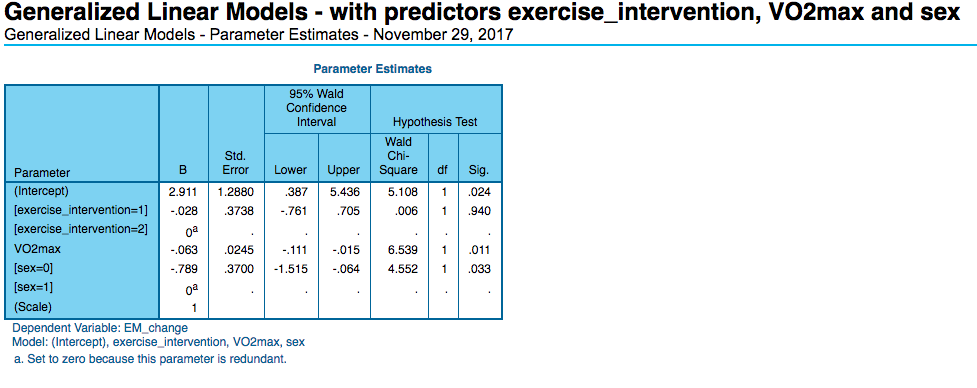

In [443]:
Image('parameters_exint-VO2-sex.png')

There is not enough evidence from this to conclude that not engaging in exercise reduces your likelihood of displaying slower eye movements.

## Fitting the model with VO2max, sex and drug as predictors

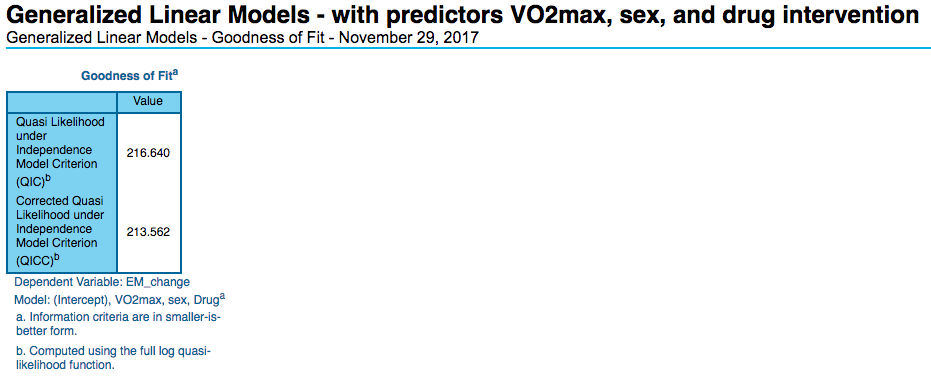

In [444]:
Image('Gof_VO2max-sex-drug.png')

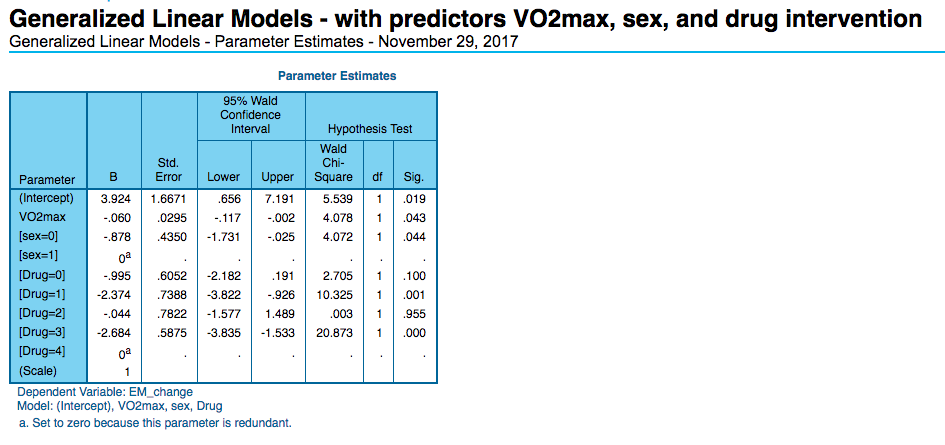

In [445]:
Image('parameters_VO2-sex-drug.png')

The fit of this model is better than before. A higher VO2max, being male and receiving caffeine or methylphenidate are significant in the model and are associated with a lower likelihood of displaying slower eye movements. The efffect of VO2max is there but looks small, and given that there were more females than males in the sample (which is small) I am skeptical about the effect of male vs female.

In [448]:
print("Odds ratios")
print("VO2max :: " + str(np.exp(-0.060)))
print("Sex :: " + str(np.exp(-.878)))
print("Caffeine :: " + str(np.exp(-2.374)))
print("Methylphenidate ::" + str(np.exp(-2.684)))

Odds ratios
VO2max :: 0.941764533584
Sex :: 0.415613307624
Caffeine :: 0.0931075502226
Methylphenidate ::0.0682894493123


# Exploring the influence of sex and aerobic capacity on eye movement speed

The code below is just grouping the data into pro and antisaccades, calculating the mean change in eye movement speed pre to post for each participant/intervention. Then recombining this into the dataset where the participant characteristics are.

In [303]:
def saccade_speed_diff(grouped_data, saccade_type='saccade'):
    
    sacccade_speed_results = pd.DataFrame(columns=['participant_num', 'intervention', 
                                                   'saccade_type', 'EM_change'])
    for name, group in grouped_data:
        # isolate timepoints within the group
        pre = group[group['timepoint'] == 'a']
        post = group[group['timepoint'] == 'b']
        
        # isolate pre and post data within groups
        pre_variable = pre['MaxSpeed(deg/s)']
        post_variable = post['MaxSpeed(deg/s)']
        
        # compute mean difference between pre and post
        speed_diff = np.mean(post_variable) - np.mean(pre_variable)
        
        # add speed differential to saccade_speed_results
        sacccade_speed_results.loc[str(name[0]) + '_' + str(name[1]) + '_' 
                                   + saccade_type] = [name[0], name[1], saccade_type, speed_diff]

    return sacccade_speed_results

In [359]:
# group the dataset by participant, intervention and timepoint
prosaccade_diff = prosaccades.groupby(['participant_num', 'Intervention'])
antisaccade_diff = antisaccades.groupby(['participant_num', 'Intervention'])

# find speed differences for prosaccade and antisaccade data
speed_diff_prosaccades = saccade_speed_diff(prosaccade_diff, saccade_type='Prosaccade')
speed_diff_antisaccades = saccade_speed_diff(antisaccade_diff, saccade_type='Antisaccade')

# concatenate prosaccades and antisaccades
speed_diff_saccades = pd.concat([speed_diff_prosaccades, speed_diff_antisaccades])

# merge the prosaccades data and the classifier data to create a new dataframe that includes the 
# classifier
saccades_diff = pd.merge(saccades, speed_diff_saccades,  how='left', 
                                  left_on=['participant_num','Intervention', 'saccade_type'], 
                                  right_on = ['participant_num','intervention', 'saccade_type'])
saccades_diff.set_index('participant_num')

,gap_overlap,direction,trial,timepoint,Intervention,saccade_type,collection_camera,status,AverageSpeed(deg/s),MaxSpeed(deg/s),Duration(ms),Latency(ms),saccade_initiation_type,Eye,trial_presentation_number,deg_moved_in_saccade,Experiment,Sex,Age,Weight (kg),Height (m),BMI (kg/m_),VO2max (ml/kg/min),60% VO2max(L/min),Power Output 60% VO2max (W),Target Heart Rate @ Workload (bpm),FEV1/FVC (%),"Habitual Caffeine Use (1 = yes, 0 = no)",intervention,EM_change
participant_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.00,gap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,208.70,537.84,44.00,273.00,normal,A,2.00,9.03,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25
1.00,gap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,198.92,414.95,40.00,286.00,normal,A,3.00,8.16,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25
1.00,gap,right,1.00,a,Caffeine,Antisaccade,A,unfatigued,224.68,548.49,42.00,272.00,normal,A,4.00,8.92,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25
1.00,gap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,222.08,418.14,34.00,190.00,normal,A,5.00,7.57,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25
1.00,overlap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,180.76,601.81,52.00,351.00,normal,A,6.00,9.38,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25
1.00,overlap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,215.43,472.97,42.00,243.00,normal,A,7.00,8.81,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25
1.00,gap,left,1.00,a,Caffeine,Antisaccade,A,unfatigued,199.30,788.86,47.00,235.00,normal,A,8.00,9.27,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25
1.00,gap,right,1.00,a,Caffeine,Antisaccade,A,unfatigued,250.30,427.92,35.00,182.00,normal,A,9.00,8.68,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25
1.00,overlap,right,1.00,a,Caffeine,Antisaccade,A,unfatigued,199.78,389.38,48.00,276.00,normal,A,10.00,9.68,crave,Female,25,59.40,1.68,20.97,42.00,nan,nan,nan,95.80,1,Caffeine,-52.25


In [360]:
sex = {'Male': 0, 'Female': 1}
saccades_diff['sex'] = saccades_diff['Sex'].map(sex)
del saccades_diff['Sex']
exercise = {'crave': 0, 'feeble': 1, 'rave': 1}
saccades_diff['exercise_intervention'] = saccades_diff['Experiment'].map(exercise)
saccades_diff = saccades_diff.groupby(['participant_num', 'Experiment', 'Intervention', 
                                       'EM_change', 'saccade_type']).agg([np.mean])
saccades_diff = saccades_diff.reset_index()
saccades_diff.columns = saccades_diff.columns.droplevel(1)

# retain only useful columns
saccades_diff = saccades_diff[['VO2max (ml/kg/min)', 'sex', 'Experiment', 'Intervention', 
                               'saccade_type', 'EM_change', 'exercise_intervention']]
# drop any rows with nan values
saccades_diff = saccades_diff.dropna(how='any')

# change the column names
saccades_diff = saccades_diff.rename(index=str, columns={'VO2max (ml/kg/min)': 'VO2max'})

In [361]:
# export to a .csv file
saccades_diff.to_csv('/Users/Charlie/Desktop/saccades_diff_analysis.csv')

In [367]:
# option to import the .csv if needed
saccades_diff = pd.read_csv('/Users/Charlie/Desktop/saccades_diff_analysis.csv')
del saccades_diff['Unnamed: 0']

### Change in eye movement velocity and sex

In [370]:
saccades_diff.groupby('sex').describe()

EM_change                                                VO2max        \
        count   mean   std     min    25%   50%   75%    max  count  mean   
sex                                                                         
0       80.00  13.01 53.87 -155.90 -22.32  5.94 30.16 179.34  80.00 58.89   
1      112.00 -13.07 51.68 -154.31 -43.37 -8.93 16.13 142.09 112.00 53.97   

                                       exercise_intervention                 \
     std   min   25%   50%   75%   max                 count mean  std  min   
sex                                                                           
0   9.16 46.50 53.00 55.19 63.23 77.00                 80.00 0.75 0.44 0.00   
1   6.10 40.00 51.53 54.91 56.00 66.80                112.00 0.75 0.43 0.00   

                         
     25%  50%  75%  max  
sex                      
0   0.75 1.00 1.00 1.00  
1   0.75 1.00 1.00 1.00

On average, males have eye movements that are 13 deg/s faster at the 'post' time point, while females exhibit an average reduction in speed by approximately the same magnitude.

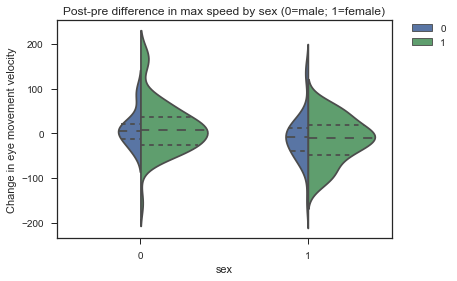

In [365]:
ax = sns.violinplot(x='sex', y='EM_change', data=saccades_diff, hue='exercise_intervention', 
                    split=True, scale='count', inner='quartile')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Post-pre difference in max speed by sex (0=male; 1=female)')
plt.ylabel('Change in eye movement velocity')
plt.show()

The violin plot above shows the distribution of pre-post changes in eye movement velocity for males (0) and females(1). The legend is referring to the presence (1) or absence(0) of the exercise intervention. Sticks show quartiles and the plots are sized to take into account the number of observations. 

### Change in eye movement velocity and aerobic capacity

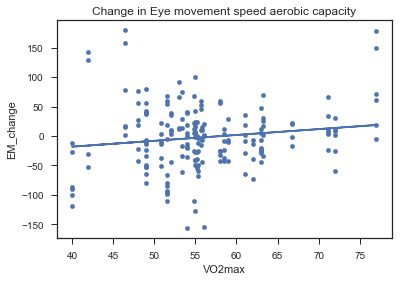

Pearsons R :: 0.145096645691
p-value :: 0.044640267225
Standard error :: 0.491545274761


In [343]:
m, c , r, p, se = stats.linregress(saccades_diff['VO2max'], saccades_diff['EM_change'])
saccades_diff.plot.scatter('VO2max', 'EM_change')
plt.plot(saccades_diff['VO2max'], m*saccades_diff['VO2max'] + c, '-')
plt.title('Change in Eye movement speed aerobic capacity')
plt.show()
print('Pearsons R :: ' + str(r))
print('p-value :: ' + str(p))
print('Standard error :: ' + str(se))